<a href="https://colab.research.google.com/github/mlaricobar/Deep-Learning-Course/blob/master/NOT01_Introducci%C3%B3n_a_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Pytorch

## 1. Acerca de Pytorch

Bienvenidos! En este módulo aprenderás a cómo usar Pytorch para poder construir modelos de Deep Learning. Pytorch fue lanzado a inicios del 2017 y ha tenido un gran impacto en la comunidad del Deep Learning. Fue desarrollado como un proyecto **open source** por el equipo de investigación de [Facebook AI](https://research.fb.com/category/facebook-ai-research/), pero que está siendo adoptada  por equipos de todo el mundo en la industria y en lo académico. 

Pytorch es considerado el mejor framework para aprender Deep Learning y es muy cómodo trabajar en general. Al final de este módulo, crearemos nuestro propio modelo de Deep Learning para clasificar imágenes de perros y gatos.

**Pytorch** se comporta de muchas maneras como los arreglos que has visto en Numpy. Estos arreglos de Numpy, después de todo, son sólo **tensors**. Pytorch toma estos tensores y hace que sea sencillo moverlos a las GPUs para el procesamiento más rápido que se necesita al entrenar redes neuronales. También proporciona un módulo que calcula automáticamente los gradientes (para el backpropagation) y otro módulo específicamente para la construcción de redes neuronales. En general, Pytorch termina siendo más coherente con Python y el stack Numpy/Scipy en comparación con Tensorflow y otros marcos.

### Redes Neuronales

Deep Learning se basa en las redes neuronales artificiales que han existido de alguna forma desde finales de 1950. Las redes se construyen a partir de partes individuales que se aproximan a las neuronas, típicamente llamadas **unidades** o simplemente **neuronas**. Cada unidad tiene algún número de entradas ponderadas. Estas entradas ponderadas se suman (una combinación lineal) y luego se pasan a través de una función de activación para obtener la salida de la unidad.

![texto alternativo](https://github.com/mikolarico/course-images/blob/master/simple_neuron.png?raw=true)

Matemáticamente se ve de esta forma:

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

A continuación se muestra el producto escalar de los vectores: 

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## 2. Tensors

Resulta que los cálculos de las redes neuronales son sólo un grupo de operaciones de algebra lineal sobre tensores, una generalización de las matrices. Por ejemplo, un vector es un tensor unidimensional, una matriz es un tensor bidimensional, una matriz con tres índices es un tensor tridimensional (por ejemplo las imágenes en color RGB). La estructura de datos fundamental para las redes neuronales son los tensores y Pytorch (así como casi todos los demás frameworks de Deep Learning) se basa en ellos.

![texto alternativo](https://github.com/mikolarico/course-images/blob/master/tensor_examples.png?raw=true)

Ya con lo básico cubierto, es hora de explorar cómo podemos usar Pytorch para construir una simple red neuronal.

In [0]:
# Primero importamos la librería de Pytorch
import torch

In [0]:
def activation(x):
  """ Función de activación Sigmoide
  
      Argumentos
      ------------
      x: torch.Tensor
  """
  return 1 / (1 + torch.exp(-x))

In [0]:
### Generaremos algunos datos
torch.manual_seed(7) # Establecemos el valor de la semilla para replicar los resultados

# Features son 3 variables aleatorias con distribución normal
features = torch.randn((1, 5))

# Pesos para nuestros datos, variables normales aleatorias nuevamente
weights = torch.randn_like(features)

# y el sesgo
bias = torch.randn((1, 1))

In [0]:
features

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])

In [0]:
weights

tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])

In [0]:
bias

tensor([[0.3177]])

En las líneas anteriores, se generaron datos que podemos usar para obtener la salida de nuestra simple red. Todo es aleatorio por ahora, en el futuro comenzaremos a usar datos normales. Iremos paso a paso en cada línea:

`features = torch.randn((1, 5))` crea un tensor con dimensiones `(1, 5)`, una fila y 5 columnas, que contiene valores distribuidos aleatoriamente según la distribución normal con una media de cero y una desviación estándar de uno.

`weights = torch.randn_like(features)` crea otro tensor con las mismas dimensiones que `features`, nuevamente contiene los valores de una distribución normal.

Finalmente `bias = torch.randn((1, 1))` crea un único valor a partir de una distribución normal.

Los tensores de Pytorch se pueden sumar, multiplicar, restar, etc, al igual que los arreglos de Numpy. En general, utilizarás Pytorch de la misma forma que con las matrices de Numpy. Vienen con algunos buenos beneficios, como la aceleración de GPY, que veremos más adelante. Por ahora, use los datos generados para calcular la salida de esta simple red de una sola capa.

> **Ejercicio**: Calcule la salida de la red con las variables de entrada `features`, pesos `weights` y sesgo `bias`. Similar a Numpy, Pytorch tiene una función [`torch.sum()`](https://pytorch.org/docs/stable/torch.html#torch.sum) así como el método `.sum()` en los tensores, para sumarlos. Use la función `activation` definida anteriormente como la función de activación.





In [0]:
## Calcular la salida de la red usando los tensores de pesos y sesgo
y = activation(torch.sum(features * weights) +  bias)
y

tensor([[0.1595]])

In [0]:
y = activation((features * weights).sum() +  bias)
y

tensor([[0.1595]])

Puedes hacer la multiplicación y la suma en la misma operación usando una multiplicación de matrices. En general, queremos usar las multiplicaciones de matrices, ya que son más eficientes y aceleradas al usar librerías modernas y cálculo de alto rendimiento en las GPUs.

Aquí, queremos hacer una multiplicación matricial de las características y los pesos. Para esto podemos usar [`torch.mm()`](https://pytorch.org/docs/stable/torch.html#torch.mm) o [`torch.matmul()`](https://pytorch.org/docs/stable/torch.html#torch.matmul) que es algo más complicado y soporta el broadcasting. Si intentamos hacerlo con `features` y `weight` como están, obtendremos un error

```python
>> torch.mm(features, weights)

---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-13-15d592eb5279> in <module>()
----> 1 torch.mm(features, weights)

RuntimeError: size mismatch, m1: [1 x 5], m2: [1 x 5] at /Users/mlaricobar/minicondabuild3/conda-bld/pytorch_1524590658547/work/aten/src/TH/generic/THTensorMath.c:2033
```

Cuando construyas redes neuronales en cualquier framework, verás esto a menudo. Muy a menudo. Lo que sucede aquí es que nuestros tensores no tienen las dimensiones correctas para realizar una multiplicación de matrices. Recuerde que para las multiplicaciones matriciales, el número de columnas en el primer tensor debe ser igual al número de filas en el segundo tensor. Tanto `features` como `weights` tienen la misma dimensión, `(1, 5)`. Esto significa que necesitamos cambiar la forma de `weights` para que la multiplicación de matrices funcione.

**Nota:** Para ver la forma de un tensor llamado `tensor`, use `tensor.shape`. Si te encuentras construyendo redes neuronales, a menudo utilizarás este método.

Hay algunas opciones aquí: [`weights.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape), [`weights.resize_()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_), y [`weights.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

* `weight.reshape(a, b)` devolverá un nuevo tensor con los mismos datos que `weights` pero con tamaño `(a, b)` a veces, y algunas veces un clon, ya que copia los datos a otra parte de memoria.
* `weights.resize_(a, b)` devuelve el mismo tensor con una forma diferente. Sin embargo, si la nueva forma produce menos elementos que el tensor original, algunos elementos se eliminarán del tensor (pero no de la memoria). Si la nueva forma produce más elementos que el tensor original, los nuevos elementos se quedarán sin inicializar en la memoria. Aquí debo señalar que el subrayado al final del método denota que este método se realizar **en el lugar**. Aquí hay un hilo de foro para [leer más sobre las operaciones en el lugar](https://discuss.pytorch.org/t/what-is-in-place-operation/16244) en Pytorch.
* `weight.view(a, b)` devolverá un nuevo tensor con los mismos datos que `weights` pero con tamaño `(a, b)`.

Usualmente uso `.view()`, pero cualquiera de los tres métodos funcionará para esto. Entonces, ahora podemos cambiar la forma de `weights`  para tener cinco filas y una columna usando `weights.view(5, 1)`.

> **Ejercicio**: Calcule la salida de nuestra pequeña red usando la multiplicación de matrices.



In [0]:
features

tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])

In [0]:
weights.shape

torch.Size([1, 5])

In [0]:
weights.view(5, 1)

tensor([[-0.8948],
        [-0.3556],
        [ 1.2324],
        [ 0.1382],
        [-1.6822]])

In [0]:
## Calcula la salida de esta red usando la multiplicación de matrices
y = activation(torch.mm(features, weights.view(5, 1)) + bias)
y

tensor([[0.1595]])

In [0]:
## Calcula la salida de esta red usando la multiplicación de matrices
y = activation(torch.matmul(features, weights.view(5, 1)) + bias)
y

tensor([[0.1595]])

### Stack them up!

Así es como se puede calcular la salida para una sola neurona. El poder real de este algoritmo sucede cuando comienza a apilar estas unidades individuales en capas y estas  capas en una red de neuronas. La salida de una capa de neuronas se convierte en la entrada para la siguiente capa. Con múltiples unidades de entrada y unidades de salida, ahora necesitamos expresar los pesos como una matriz.

![texto alternativo](https://github.com/mikolarico/course-images/blob/master/multilayer_diagram_weights.png?raw=true)

La primera capa que se muestra en la parte inferior son las entradas, comprensiblemente llamadas **capa de entrada**. La capa intermedia se llama **capa oculta**, y la capa final es la **capa de salida**. Podemos expresar esta red matemáticamente de nuevo con matrices y usar la multiplicación de matrices para obtener combinaciones lineales para cada unidad en una sola operación. Por ejemplo, la capa oculta ($h_1$ y $h_2$) se puede calcular:


$$
\vec{h} = [h_1 \, h_2] = 
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot 
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

La salida para esta pequeña red se encuentra al tratar la capa oculta como entradas para la unidad de salida. La salida de la red se expresa simplemente como

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

In [0]:
### Generaremos algunos datos
torch.manual_seed(7) # Establecemos el valor de la semilla para replicar los resultados

# Features son 3 variables aleatorias con distribución normal
features = torch.randn((1, 3))

# Definimos el tamaño de cada capa en nuestra red
n_input = features.shape[1]     # Número de unidades de entrada, debe coincidir con el número de variables de entrada
n_hidden = 2                    # Número de unidades ocultas
n_output = 1                    # Número de unidades de salida

# Pesos para las entradas hacia la capa oculta
W1 = torch.randn(n_input, n_hidden)

# Pesos para la capa oculta hacia la capa de salida
W2 = torch.randn(n_hidden, n_output)

# y el sesgo para las capas oculta y la de salida
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

> **Ejercicio:** Calcule la salida para esta red de múltiples capas utilizando los pesos `W1` y `W2`, y los sesgos `B1` y `B2`.

In [0]:
features

tensor([[-0.1468,  0.7861,  0.9468]])

In [0]:
W1

tensor([[-1.1143,  1.6908],
        [-0.8948, -0.3556],
        [ 1.2324,  0.1382]])

In [0]:
# Escribe aquí tu solución
activation(torch.matmul(activation(torch.matmul(features, W1) + B1), W2) + B2)

tensor([[0.3171]])

El número de unidades ocultas es un parámetro de la red, a menudo llamado un **hiperparámetro** para diferenciarlo de los parámetros `weights` y `biases`. Como veremos más adelante, cuando hablemos sobre la formación de una red neuronal, cuantas más unidades ocultas tenga una red y cuantas más capas, mejor podrá aprender de los datos y hacer predicciones precisas. 

### Desde Numpy hacia Torch y al revés

Pytorch tiene una gran característica que es convertir las matrices Numpy en Tensores de Pytorch. Para crear un tensor a partir de una matriz Numpy, use `torch.from_numpy()`. Y para convertir un tensor a un arreglo de Numpy, use el método `.numpy()`.

In [0]:
import numpy as np

In [0]:
a = np.random.rand(4, 3)
a

array([[0.10145281, 0.88916582, 0.93110451],
       [0.49016089, 0.65285104, 0.98285453],
       [0.20046507, 0.03023406, 0.08145378],
       [0.92620779, 0.63962333, 0.29354865]])

In [0]:
b = torch.from_numpy(a)
b

tensor([[0.1015, 0.8892, 0.9311],
        [0.4902, 0.6529, 0.9829],
        [0.2005, 0.0302, 0.0815],
        [0.9262, 0.6396, 0.2935]], dtype=torch.float64)

In [0]:
b.numpy()

array([[0.10145281, 0.88916582, 0.93110451],
       [0.49016089, 0.65285104, 0.98285453],
       [0.20046507, 0.03023406, 0.08145378],
       [0.92620779, 0.63962333, 0.29354865]])

La memoria se comparte entre la matriz Numpy y el tensor de Torch, por lo que si cambia los valores de un objeto, el otro también cambiará.

In [0]:
# Multipliquemos el tensor de Pytorch por 2
b.mul_(2)

tensor([[0.2029, 1.7783, 1.8622],
        [0.9803, 1.3057, 1.9657],
        [0.4009, 0.0605, 0.1629],
        [1.8524, 1.2792, 0.5871]], dtype=torch.float64)

In [0]:
a

array([[0.20290563, 1.77833165, 1.86220902],
       [0.98032178, 1.30570208, 1.96570906],
       [0.40093015, 0.06046812, 0.16290755],
       [1.85241558, 1.27924666, 0.5870973 ]])

## 3. Redes Neuronales con Pytorch

Las redes de Deep Learning tienden a ser masivas con docenas o cientos de capas, es de ahí donde proviene el término **deep**. Podemos constuir una de estas redes profundas usando sólo matrices de pesos tal como hicimos en el ejemplo anterior, pero en general es muy engorroso y difícil de implementar. Sin embargo, Pytorch tiene un módulo llamado **`nn`** que proporciona una forma agradable de construir eficientemente redes neuronales grandes.

In [0]:
# Importar los paquetes necesarios

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

Ahora vamos a contruir una red más grande que pueda resolver un problema difícil, identificando el texto en una imagen. Aquí usaremos el conjunto de datos MNIST que consta de dígitos escritos a mano en escala de grises. Cada imagen es de 28x28 píxeles. A continuación veremos una muestra de ello:

![texto alternativo](https://github.com/mikolarico/course-images/blob/master/mnist.png?raw=true)

Nuestro objetivo es construir una red neuronal que pueda tomar una de estas imágenes y predecir el dígito en la imagen.

En primer lugar, necesitamos obtener nuestro conjunto de datos. Esto podemos obtenerlo a través del paquete torchvision. El siguiente código descargará el conjunto de datos MNIST, luego creará conjuntos de datos de entrenamiento y de prueba para nosotros. No nos preocupemos demasiado por los detalles aquí, aprenderemos más sobre esto más adelante.

In [2]:
### Ejecutar esta celda

from torchvision import datasets, transforms

# Definamos una variable transform para normalizar los datos

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5, ))
                               ])

# Descargar y cargar los datos de entrenamiento
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 23356075.81it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 310337.71it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 6934613.23it/s]                           
8192it [00:00, 176208.30it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


Tenemos los datos de entrenamiento cargados en la variable trainloader y lo hacemos un iterador con iter(trainloader). Más adelante, usaremos esto para recorrer el conjunto de datos para el entrenamiento tal como:

```python
for image, label in trainloader:
    ## hacer cosas con las variables images y labels
```

Notarás que he creado la variable `trainloader` con un tamaño de lote de 64 y `shuffle = True`. El tamaño del lote es la cantidad de imágenes que obtenemos en una iteración del cargador de datos y que pasaremos a través de nuestra red, a menudo llamado **batch**. Y `shuffle = True` le dice que mezcle el conjunto de datos cada vez que comenzamos a revisar el cargador de datos nuevamente. Pero aquí estoy tomando el primer lote para que podamos revisar los datos. A continuación podemos ver que `images` es solo un tensor con tamaño `(64, 1, 28, 28)`. Entonces, 64 imágenes por lote, 1 canal de color e imágenes de 28x28.



In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Así es como se ve una de las imágenes.

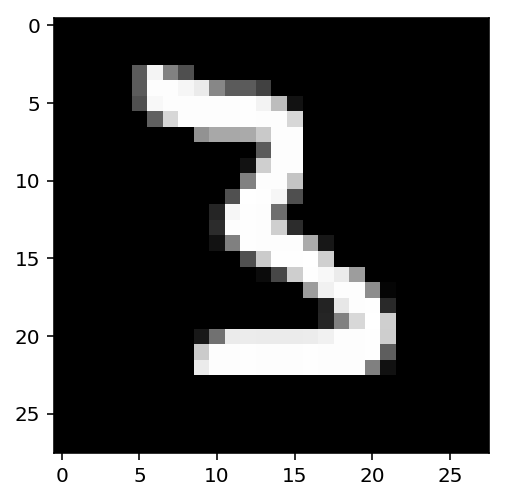

In [11]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

Primero, intentemos construir una simple red para este conjunto de datos utilizando matrices de pesos y multiplicaciones de matrices. Luego, veremos cómo hacerlo utilizando el módulo `nn` de Pytorch, que proporciona un método mucho más conveniente y poderoso para definir arquitecturas de red.

Las redes que hemos visto hasta ahora son denominadas redes *totalmente conectadas* o *densas* (*fully-connected* o *dense* networks). Cada unidad en una capa está conectada a cada unidad en la siguiente capa. En las redes totalmente conectadas, la entrada a cada capa debe ser un vector unidimensional (que se puede apilar en un tensor 2D como un lote de múltiples ejemplos). Sin embargo, nuestras imágenes son tensores 2D de 28x28, por lo que necesitamos convertirlas en vectores 1D. Pensando en los tamaños, tenemos que convertir el lote de imágenes con dimensiones `(64, 1, 28, 28)` para tener una de `(64, 784)`, 784 es 28 veces 28. Esto se suele llamar *aplanar* (o *flattening*), es por ello que aplanaremos las imágenes 2D en vectores de 1D.

Anteriormente, construimos una red con una unidad de salida. Aquí necesitaremos 10 unidades de salida, una para cada dígito. Queremos que nuestra red prediga el dígito que se muestra en una imagen, así que lo que haremos es calcular las probabilidades de que la imagen sea de cualquier dígito o clase. Esto termina siendo una distribución de probabilidad discreta sobre las clases (dígitos) que nos indica la clase más probable para la imagen. Eso significa que necesitamos 10 unidades de salida para las 10 clases (dígitos). A continuación veremos cómo convertir la salida de la red en una distribución de probabilidad.

> **Ejercicio:** Aplanar el lote de imágenes `images`. Luego, cree una red de múltiples capas con 784 unidades de entrada, 256 unidades ocultas y 10 unidades de salida utilizando tensores aleatorios para los pesos y sesgos. Por ahora, use una función de activación sigmoide para la capa oculta. Deje la capa de salida sin activación, agregaremos una que nos proporcione una distribución de probabilidad a continuación.



In [13]:
## La solución

images.shape

torch.Size([64, 1, 28, 28])

In [14]:
labels

tensor([3, 3, 1, 0, 1, 5, 2, 1, 3, 9, 4, 1, 7, 0, 8, 2, 3, 9, 9, 4, 4, 4, 1, 0,
        9, 1, 7, 4, 6, 2, 4, 0, 6, 6, 9, 3, 4, 8, 4, 5, 5, 6, 0, 7, 5, 1, 0, 9,
        2, 3, 0, 3, 1, 9, 8, 7, 5, 6, 5, 3, 3, 9, 8, 0])

In [15]:
### Generaremos algunos datos
torch.manual_seed(7) # Establecemos el valor de la semilla para replicar los resultados

In [0]:
def activation(x):
  return 1 / (1 + torch.exp(-x))

In [0]:
features = images.view(64, 784)

In [0]:
n_input = 784
n_hidden = 256
n_output = 10

In [0]:
W1 = torch.randn(n_input, n_hidden)
W2 = torch.randn(n_hidden, n_output)

In [0]:
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [0]:
h = activation(torch.mm(features, W1) + B1)
output = torch.mm(h, W2) + B2

In [28]:
output

tensor([[-27.7669, -13.8905,  -1.1529,  -5.7203,  16.6270,   8.2526,   2.9055,
          -4.3721,  -7.4737,  -8.5906],
        [-15.2588, -11.3933,  -7.9152,  -9.7236,  11.1909,  -4.1150,  -1.4961,
          -8.3986,  -9.3693,  -8.7608],
        [-18.0404, -12.3619,  -5.0185, -11.8582,  10.1815,  -0.2901,  -4.1420,
           7.1525, -15.3154,  -6.8592],
        [-19.9951,   5.0128,   3.8785,   4.3239,   1.0786,  15.7866, -10.4384,
         -13.5931,  -7.9890,   0.8132],
        [-20.1771, -14.3409, -11.0857,  -4.7975,  12.8362,   3.6980,  -0.2518,
           7.9659,  -8.9829,  -5.2229],
        [-10.6611, -11.1762,   5.3435,  -4.6920,   3.4401,  13.0563,   7.2186,
          -7.8680,  -8.3309,  -0.5354],
        [-10.7510,   2.3350,  -1.2029,  -2.4235,  13.5315,   4.6452,  -6.3423,
           0.1913, -12.0851,  -0.1430],
        [-11.4159, -12.1840,   2.2685, -11.3957,  11.0622,   5.7885,  -5.1498,
          -0.6172,  -3.4788,  -7.9602],
        [-19.5632, -10.4094,  -5.7883, -21.1476,

In [24]:
output.shape

torch.Size([64, 10])

Ahora tenemos 10 salidas para nuestra red. Queremos pasar una imagen a nuestra red y obtener una distribución de probabilidad entre las clases que nos diga las clases más probables a las que pertenece la imagen. Algo como se ve a continuación:

![texto alternativo](https://github.com/mikolarico/course-images/blob/master/image_distribution.png?raw=true)

Aquí vemos que la probabilidad para cada clase es aproximadamente la misma. Esto representa una red no entrenada, aún no ha visto ningún dato, por lo que sólo devuelve una distribución uniforme con probabilidades iguales para cada clase.

Para calcular esta distribución de probabilidad, a menudo usamos la [función **softmax**](https://en.wikipedia.org/wiki/Softmax_function). Matemáticamente esto se define como:

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

Lo que esto hace es normalizar cada entrada $x_i$ entre 0 y 1 para darle una distribución de probabilidad adecuada donde las probabilidades suman uno.

> **Ejercicio:** Implementar una función `softmax` que realiza el cálculo de softmax y devuelve las distribuciones de probabilidad para cada ejemplo en el lote. Tenga en cuenta que tendrá que prestar atención a las formas al hacer esto. Si tiene un tensor `a` con forma `(64, 10)` y un tensor `b` con forma `(64,)`, hacer `a/b` le dará un error porque Pytorch intentará hacer la división a través de las columnas (llamado broadcasting) pero obtendrá una falta de coincidencia de tamaño. La forma de pensar sobre esto es que para cada uno de los 64 ejemplos, solo se desea dividir por un valor, la suma en el denominador. Entonces necesitamos que `b` tenga la forma de `(64,1)`. De esta manera, pytorch dividirá los 10 valores en cada fila de `a` por el valor en cada fila de `b`. Presta atención a cómo tomas la suma también. Tendremos que definir la palabra `dim` en `torch.sum`. El ajuste `dim=0` toma la suma a través de las filas, mientras que `dim=1` toma la suma a través de las columnas.

In [37]:
def softmax(x):
  ## Por hacer: Implementar aquí la función de softmax
  return torch.exp(x) / torch.exp(x).sum(dim=1).view(64, 1)

# Aquì, out debe ser la salida de la red del ejercicio anterior
probabilities = softmax(output)

# ¿Tiene la forma correcta? Debe ser (64, 10)
print(probabilities.shape)

# ¿Suman 1?
print(probabilities.sum(dim=1))  

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## 4. Transfer Learning